In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('laptop_price.csv',encoding='latin-1')

In [3]:
df.shape

(1303, 13)

In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [5]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [6]:
df=df.join(pd.get_dummies(df.Company))
df=df.drop('Company',axis=1)

In [7]:
df=df.join(pd.get_dummies(df.TypeName))
df=df.drop('TypeName',axis=1)

In [8]:
df['ScreenResolution']=df.ScreenResolution.str.split(' ').apply(lambda x:x[-1])

In [9]:
df['px_width']=df.ScreenResolution.str.split('x').apply(lambda x:x[0])
df['px_height']=df.ScreenResolution.str.split('x').apply(lambda x:x[1])

In [10]:
df=df.drop('ScreenResolution',axis=1)

In [11]:
df=df.drop('Product',axis=1)

In [12]:
df['Frequency']=df['Cpu'].str.split(' ').apply(lambda x:x[-1])

In [13]:
df['cpu_type']=df['Cpu'].str.split(' ').apply(lambda x:x[0])

In [14]:
df=df.drop('Cpu',axis=1)

In [15]:
df['memory_type']=df['Memory'].str.split(' ').apply(lambda x:x[1])

In [16]:
df['memory_amount']=df['Memory'].str.split(' ').apply(lambda x:x[0])

In [17]:
def turn(value):
    if 'TB' in value:
        return float(value[:value.find('TB')])*1000
    else:
        return float(value[:value.find('GB')])

In [18]:
df['memory_amount']=df['memory_amount'].apply(turn)

In [19]:
df=df.drop('Memory',axis=1)

In [20]:
df['gpu_type']=df.Gpu.str.split(' ').apply(lambda x: x[0])

In [21]:
df['Ram']=df.Ram.apply(lambda x: x[:-2])

In [22]:
df=df.drop('Gpu',axis=1)

In [23]:
df['Weight']=df.Weight.apply(lambda x: x[:-2])

In [24]:
df["OpSys"]=df["OpSys"].str.split(' ').apply(lambda x: x[0])

In [25]:
df=df.join(pd.get_dummies(df['OpSys']))

In [26]:
df=df.drop('OpSys',axis=1)

In [27]:
df['Frequency']=df.Frequency.apply(lambda x: x[:-3])

In [28]:
df

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,memory_type,memory_amount,gpu_type,Android,Chrome,Linux,Mac,No,Windows,macOS
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,SSD,128.0,Intel,0,0,0,0,0,0,1
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,Flash,128.0,Intel,0,0,0,0,0,0,1
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,SSD,256.0,Intel,0,0,0,0,1,0,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,SSD,512.0,AMD,0,0,0,0,0,0,1
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,SSD,256.0,Intel,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.8,638.00,0,0,0,0,0,...,SSD,128.0,Intel,0,0,0,0,0,1,0
1299,1317,13.3,16,1.3,1499.00,0,0,0,0,0,...,SSD,512.0,Intel,0,0,0,0,0,1,0
1300,1318,14.0,2,1.5,229.00,0,0,0,0,0,...,Flash,64.0,Intel,0,0,0,0,0,1,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,HDD,1000.0,AMD,0,0,0,0,0,1,0


In [35]:
df.nunique()

laptop_ID             1303
Inches                  18
Ram                      9
Weight                 179
Price_euros            791
Acer                     2
Apple                    2
Asus                     2
Chuwi                    2
Dell                     2
Fujitsu                  2
Google                   2
HP                       2
Huawei                   2
LG                       2
Lenovo                   2
MSI                      2
Mediacom                 2
Microsoft                2
Razer                    2
Samsung                  2
Toshiba                  2
Vero                     2
Xiaomi                   2
2 in 1 Convertible       2
Gaming                   2
Netbook                  2
Notebook                 2
Ultrabook                2
Workstation              2
px_width                13
px_height               10
Frequency               29
cpu_type                 3
memory_type              4
memory_amount           13
gpu_type                 4
A

(array([619., 200., 375.,  22.,   0.,  25.,  41.,  17.,   3.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

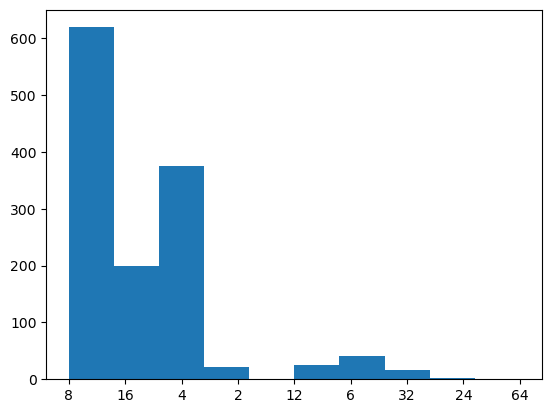

In [65]:
plt.hist(df['Ram'],bins=10)

In [68]:
u=df['Ram'].quantile(0.95)

16.0

In [67]:
df['Ram']=df['Ram'].astype('int')

In [30]:
df['Weight']=df['Weight'].astype('float')
df['px_width']=df['px_width'].astype('int')
df['px_height']=df['px_height'].astype('int')
df['memory_amount']=df['memory_amount'].astype('int')
df['Frequency']=df['Frequency'].astype('float')

In [31]:
df.dtypes

laptop_ID               int64
Inches                float64
Ram                     int32
Weight                float64
Price_euros           float64
Acer                    uint8
Apple                   uint8
Asus                    uint8
Chuwi                   uint8
Dell                    uint8
Fujitsu                 uint8
Google                  uint8
HP                      uint8
Huawei                  uint8
LG                      uint8
Lenovo                  uint8
MSI                     uint8
Mediacom                uint8
Microsoft               uint8
Razer                   uint8
Samsung                 uint8
Toshiba                 uint8
Vero                    uint8
Xiaomi                  uint8
2 in 1 Convertible      uint8
Gaming                  uint8
Netbook                 uint8
Notebook                uint8
Ultrabook               uint8
Workstation             uint8
px_width                int32
px_height               int32
Frequency             float64
cpu_type  

In [32]:
df=df.join(pd.get_dummies(df['memory_type'],columns=['memory']))
df=df.join(pd.get_dummies(df['gpu_type'],columns=['gpu']))

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=df.drop(columns=['Price_euros','gpu_type','memory_type','cpu_type'])
y=df['Price_euros']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [36]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [37]:
m1=LinearRegression()
m1.fit(x_train,y_train)
m1.score(x_test,y_test)

0.8063206467293677

In [38]:
m2=RandomForestRegressor()
m2.fit(x_train,y_train)
m2.score(x_test,y_test)

0.8659200180799355

In [39]:
m3=DecisionTreeRegressor()
m3.fit(x_train,y_train)
m3.score(x_test,y_test)

0.7934864428007083

In [40]:
m4=KNeighborsRegressor()
m4.fit(x_train,y_train)
m4.score(x_test,y_test)

0.4812931730822597

In [41]:
m5=GradientBoostingRegressor()
m5.fit(x_train,y_train)
m5.score(x_test,y_test)

0.8733685975908926

In [42]:
m6=Ridge(alpha=1.0)
m6.fit(x_train,y_train)
m6.score(x_test,y_test)

0.8035881563721048

In [43]:
m6=Lasso(alpha=1.0)
m6.fit(x_train,y_train)
m6.score(x_test,y_test)

0.7976345159340807

In [ ]:
# !pip3 install auto-sklearn

In [ ]:
# import autosklearn

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [8]:
from sklearn import preprocessing as p

In [9]:
m=p.MinMaxScaler(feature_range=(0,1))